# WeatherPy
----

### Analysis
* There is no correlation between latitude and cloudiness. 
* The temperature does increase as you near the equator. The northern hemisphere is on average warmer than the southern hemisphere.
* Humidity 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
from pprint import pprint

# Import API key
api_key = '8266950a9588954101077869b482a1e1'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {'units': 'imperial','appid':api_key, 'q': ''}

#for loop that cycles through cities API calls
print('Beginning Data Retrieval\n-------------------------')


i = 0
for city in cities:
    params.update({'q':city})
    response = requests.get(url,params = params).json()
    
    #exception handling
    try:
        i +=1
        print(f'Processing Record {i} - {city}')
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        print('City not found. Skipping...') 
    if i % 50 == 0:
        time.sleep(10)



Beginning Data Retrieval
-------------------------
Processing Record 1 - tiksi
Processing Record 2 - barrow
Processing Record 3 - thompson
Processing Record 4 - wahran
City not found. Skipping...
Processing Record 5 - vaasa
Processing Record 6 - narva-joesuu
Processing Record 7 - atuona
Processing Record 8 - longyearbyen
Processing Record 9 - bredasdorp
Processing Record 10 - rikitea
Processing Record 11 - punta arenas
Processing Record 12 - lufilufi
Processing Record 13 - hamilton
Processing Record 14 - victoria
Processing Record 15 - iqaluit
Processing Record 16 - ushuaia
Processing Record 17 - bluff
Processing Record 18 - mys shmidta
City not found. Skipping...
Processing Record 19 - jamestown
Processing Record 20 - castro
Processing Record 21 - kavieng
Processing Record 22 - nioro
Processing Record 23 - kodinsk
Processing Record 24 - kapaa
Processing Record 25 - hermanus
Processing Record 26 - cidreira
Processing Record 27 - yellowknife
Processing Record 28 - illoqqortoormiut
City 

Processing Record 229 - bambanglipuro
Processing Record 230 - satitoa
City not found. Skipping...
Processing Record 231 - torbay
Processing Record 232 - grand gaube
Processing Record 233 - sur
Processing Record 234 - mikuni
Processing Record 235 - hambantota
Processing Record 236 - maura
Processing Record 237 - souillac
Processing Record 238 - chake chake
Processing Record 239 - hervey bay
Processing Record 240 - senmonorom
City not found. Skipping...
Processing Record 241 - roald
Processing Record 242 - saldanha
Processing Record 243 - geraldton
Processing Record 244 - nome
Processing Record 245 - sao paulo de olivenca
Processing Record 246 - cururupu
Processing Record 247 - samusu
City not found. Skipping...
Processing Record 248 - salinopolis
Processing Record 249 - tidore
City not found. Skipping...
Processing Record 250 - belmonte
Processing Record 251 - kaitangata
Processing Record 252 - saint-pierre
Processing Record 253 - puerto plata
Processing Record 254 - nhulunbuy
Processin

Processing Record 451 - sulurpeta
City not found. Skipping...
Processing Record 452 - vanavara
Processing Record 453 - venice
Processing Record 454 - fare
Processing Record 455 - kroya
Processing Record 456 - sungurlu
Processing Record 457 - araouane
Processing Record 458 - bethel
Processing Record 459 - camacha
Processing Record 460 - washougal
Processing Record 461 - ocosingo
Processing Record 462 - vila franca do campo
Processing Record 463 - cockburn town
Processing Record 464 - hohhot
Processing Record 465 - inhambane
Processing Record 466 - monatele
City not found. Skipping...
Processing Record 467 - verkhnetulomskiy
Processing Record 468 - nyurba
Processing Record 469 - pochutla
Processing Record 470 - demba
Processing Record 471 - asuncion mita
Processing Record 472 - nouakchott
Processing Record 473 - shimoda
Processing Record 474 - belle fourche
Processing Record 475 - medvezhyegorsk
Processing Record 476 - deputatskiy
Processing Record 477 - katsuura
Processing Record 478 - 

In [4]:
city_dataDict = {'City':city_name, 'Cloudiness': cloudiness, 'Country': country, 'Date': date, 'Humidity': humidity, 'Lat':lat, 'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed}

city_dataDF = pd.DataFrame(city_dataDict)

city_dataDF.to_csv("output/cities.csv",sep = ',')

city_dataDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,44,RU,1554240686,78,71.64,128.87,6.40,2.73
1,Barrow,0,AR,1554240854,50,-38.31,-60.23,69.31,17.72
2,Thompson,90,CA,1554238800,56,55.74,-97.86,15.80,12.75
3,Vaasa,0,FI,1554240760,59,63.10,21.62,37.99,9.17
4,Narva-Joesuu,12,EE,1554240857,83,59.46,28.04,28.63,3.18


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

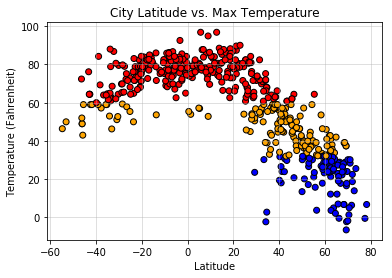

In [5]:
colors = []
for t in city_dataDF['Max Temp']:
    if t > 60:
        colors.append('red')
    elif t > 32:
        colors.append('orange')
    else:
        colors.append('blue')
        

plt.scatter(city_dataDF['Lat'],city_dataDF['Max Temp'],color = colors, edgecolor = 'black')
plt.grid(alpha = 0.5)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')

plt.savefig('output/LatVsTemp.png')


#### Latitude vs. Humidity Plot

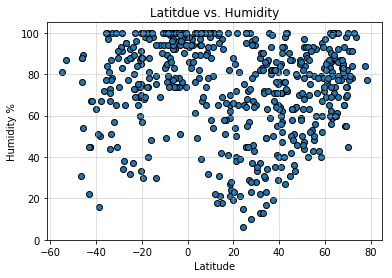

In [11]:
plt.scatter(city_dataDF['Lat'],city_dataDF['Humidity'], edgecolor = 'black')
plt.grid(alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.title('Latitdue vs. Humidity')
plt.savefig('output/LatVsHumidity.png')

#### Latitude vs. Cloudiness Plot

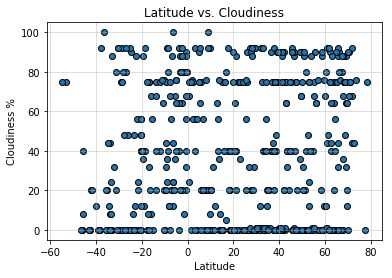

In [12]:
plt.scatter(city_dataDF['Lat'],city_dataDF['Cloudiness'], edgecolor = 'black')
plt.grid(alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs. Cloudiness')
plt.savefig('output/LatVsCloudiness.png')

#### Latitude vs. Wind Speed Plot

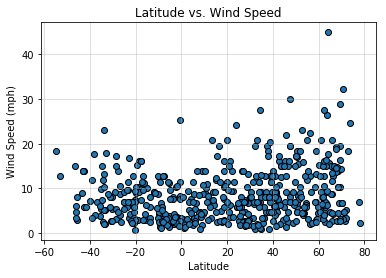

In [13]:
plt.scatter(city_dataDF['Lat'],city_dataDF['Wind Speed'], edgecolor = 'black')
plt.grid(alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.savefig('output/LatVsWindSpeed.png')